## Корреляция. Коэффициенты ранговой корреляции Спирмена, Кендалла  
В случае нарушения требований данных корреляции Пирсона, могут быть полезны коэффициенты корреляции Спирмена и Кэндалла,  
которые вместо реальных значений анализируют их ранги.

Требования к данным:
* Связь нелинейна
* Могут присутствовать выбросы
* Переменные распределены не нормально

### Задача  
Допустим у нас есть данные на 14 учащихся одного класса по уровню интеллекта (IQ) и время решения серии логических заданий (X).  
Необходимо определить взамиосвязь двух переменных (используя коэффициет Спирмена).

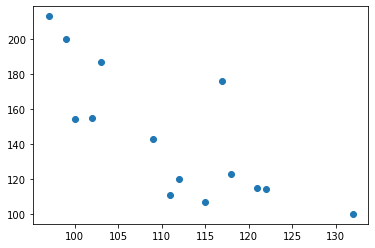

corr: -0.7582417582417582
t: -4.028732036035881
p_value: 0.0016730034070264743
p_value(X < -4.03 or X > -4.03) < alpha. Reject H0


In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Xiq = np.array([100, 118, 112, 97, 99, 103, 102, 132, 122, 121, 115, 117, 109, 111])
X = np.array([154, 123, 120, 213, 200, 187, 155, 100, 114, 115, 107, 176, 143, 111])

plt.scatter(Xiq, X)
plt.show()

corr = 1 - (6 * sum((st.rankdata(Xiq, method='ordinal') - st.rankdata(X, method='ordinal')) ** 2)) / (len(Xiq) * (len(Xiq) ** 2 - 1))
print('corr:', corr)

# H0: corr_xy = 0
# H1: corr_xy != 0
alpha = 0.05

df = len(Xiq) - 2

t = (corr * (df ** 0.5)) / ((1 - (corr ** 2)) ** 0.5)
print('t:', t)

p_value = 2 * (1 - st.t.cdf(abs(t), df))
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) < alpha. Reject H0')

In [2]:
print('corr_table scipy. spearmanr: ', st.spearmanr(Xiq, X))

corr_table scipy. spearmanr:  SpearmanrResult(correlation=-0.7582417582417583, pvalue=0.0016730034070264247)


In [3]:
print('corr_table scipy. kendalltau: ', st.kendalltau(Xiq, X))

corr_table scipy. kendalltau:  KendalltauResult(correlation=-0.6263736263736264, pvalue=0.0012344453248471106)
